In [6]:
import pandas as pd
from clean import *

import plotly.express as px

/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.

/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [7]:
data = pd.read_csv('data/profile_data.csv')

In [8]:
data = clean(data)
stats(data)

-----------------
CLEANING DATA
...
FOUND 56783 ENTRIES
REMOVED 0 EMPTY ENTRIES
REMOVED 0 DUPLICATED ENTRIES
-----------------
CALCULATING STATS
...
FOUND 56783 ENTRIES
56335 ENTRIES HAVE AGE DATA (99.2%)
19773 ENTRIES HAVE COLLEGE DATA (34.8%)
14456 ENTRIES HAVE CITY DATA (25.5%)
14540 ENTRIES HAVE JOB DATA (25.6%)
10153 ENTRIES HAVE GENDER DATA (17.9%)
55631 ENTRIES HAVE DISTANCE DATA (98.0%)
42256 ENTRIES HAVE DETAIL DATA (74.4%)
15078 ENTRIES HAVE ANTHEM DATA (26.6%)
...
AVERAGE AGE IN DATA SET: 24
NUMBER OF UNIQUE COLLEGES: 7793
NUMBER OF UNIQUE JOBS: 9530
NUMBER OF UNIQUE CITIES: 2793


In [ ]:
song = data.groupby('anthem').count().name.idxmax()

anthem
("'39 - Remastered 2011", 'Queen')                                                                                                                     1
("'Cause I'm A Man", 'Tame Impala')                                                                                                                    1
("'S Wonderful", 'João Gilberto')                                                                                                                      1
("'פאוץ", 'Noa Kirel')                                                                                                                                 1
("(I Can't Get No) Satisfaction - Mono Version", 'The Rolling Stones')                                                                                 1
("(Joe Gets Kicked Out of School for Using) Drugs With Friends (But Says This Isn't a Problem)", 'Car Seat Headrest')                                  1
("(Sittin' On) The Dock Of The Bay", 'Otis Redding')                       

In [30]:
age_query = int(input("Enter age group:"))
place = data.groupby('city').count().name.idxmax()
print('Most {} year olds live in {}'.format(age_query,place))

Enter age group:35
Most 35 year olds live in Los Angeles


In [18]:
data.head()

,name,age,college,job,city,gender,distance,details,anthem,profile_pic_urls
0,Gianna,19.0,NaN,NaN,Barnegat,NaN,2430.0,ig- _.giaannaa_\r\nsc- gianna8378,"('Slide (Remix) (feat. Pop Smoke, A Boogie Wit...",['https://images-ssl.gotinder.com/5dc0814dfc09...
1,Lauren,21.0,Florida State University,NaN,NaN,NaN,1981.0,A meme,NaN,['https://images-ssl.gotinder.com/5e8a352520cc...
2,Britanny,19.0,Santa Ana College,Boys and girls club,Garden Grove,NaN,19.0,Get to know me ☺️ Never been to Disneyland 😅 S...,NaN,['https://images-ssl.gotinder.com/5cace3ad9b7a...
3,Kayla,28.0,School,NaN,Los Angeles,Woman,18.0,"I am a creative person that loves simple, inno...",NaN,['https://images-ssl.gotinder.com/5e90cb67da1c...
4,Kimberly,18.0,"California State University, Los Angeles",NaN,NaN,Woman,15.0,Just for fun\r\nI’m 5’2,NaN,['https://images-ssl.gotinder.com/5e0ffa53349f...


In [14]:
def calc_similarity(data,category,value):
    '''
    Take details per user in specified dataset with category equal to value
    Vectorize each
    Compare each to each and calculate mean
    Get distribution of means of all users
    Calculate and label users based on standard deviations away from mean
    Export report based on results (to be interactive in future)
    '''

    print("Calculating user similarity on dataset where {} equals {}".format(category,value))
    specified = data[data[category]==value]
    specified = specified[-specified[category].isna()]
    specified = specified[-specified['details'].isna()]
    print("Found {} Users".format(len(specified)))
    contents = specified.details
    
    # Vectorize details per user
    vectorizer, vocabulary = build_text_vectorizer(contents,
                             use_tfidf=True,
                             use_stemmer=True,
                             max_features=5000)
    X = vectorizer(contents)
    return X
#     means = []
#     for each in X:
#         #compare each to each

In [24]:
test = calc_similarity(data,'city','Pasadena')

Calculating user similarity on dataset where city equals Pasadena
Found 104 Users


In [25]:
import numpy as np

def cosine_distance(a, b):
    """Compute the cosine dissimilarity between two numpy arrays.
    Parameters
    ----------
    a: numpy array
    b: numpy array
    Returns
    -------
    distance: float
    """
    return 1 - np.dot(a, b) / np.sqrt(np.dot(a, a) * np.dot(b, b))

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial

In [85]:
avg1 = np.mean(test,axis=0)

In [104]:
avg1.reshape(1,-1).shape

(1, 911)

In [114]:
# AVERAGE COSINE TEST
cosine_diff = []
for user in test:
    cosine_diff.append(cosine_similarity(user.reshape(1,-1),avg1.reshape(1,-1))[0][0])

In [116]:
cosine_diff[0]

0.20525283374266903

In [84]:
test[0].shape

(911,)

104

In [127]:
cosine_diff_each = []
for user in test:
    average = []
    for other in test:
        average.append(cosine_similarity(user.reshape(1, -1),other.reshape(1, -1))[0][0])
    cosine_diff_each.append(np.mean(average))

In [128]:
cosine_diff_each

[0.033217067275219885,
 0.020623662983073034,
 0.013790848826189993,
 0.03214134695681702,
 0.020308531162758915,
 0.02952980300653479,
 0.01497215106932855,
 0.0188154633603541,
 0.0363343534733859,
 0.03260364880251138,
 0.023089895462408378,
 0.03977280219833413,
 0.02209534380665114,
 0.024518697234698017,
 0.04326485608695458,
 0.01730927437942031,
 0.029812077702545146,
 0.022756434031593883,
 0.020035778747470093,
 0.023084511967245515,
 0.025195538243854402,
 0.032309371465113215,
 0.0351630312137233,
 0.018437156151321684,
 0.02617098575477064,
 0.017122260853480432,
 0.020438357723630642,
 0.04954354635325631,
 0.033405993089157524,
 0.031626783247436986,
 0.030624145314093684,
 0.04159377559189116,
 0.020115216549536297,
 0.019172248977503394,
 0.025823710666797058,
 0.02850934400309358,
 0.01258930827494218,
 0.013678149383639742,
 0.03121307348506758,
 0.01715036494780279,
 0.030556587292969284,
 0.023170569278996418,
 0.031962826173988775,
 0.01966582329607528,
 0.0357231

In [45]:
df = data[data.city=="Pasadena"]

In [46]:
df = df[-df.details.isna()]

In [129]:
df['cosine'] = cosine_diff_each
df['words'] = df.details.apply(lambda x: len(x.split(' ')))

In [130]:
df.sort_values('cosine')

,name,age,college,job,city,gender,distance,details,anthem,profile_pic_urls,cosine,words
42023,Jasi,29.0,NaN,Fashion Stylist,Pasadena,NaN,2.0,🦂,NaN,['https://images-ssl.gotinder.com/5e779a19e073...,0.000000,2
48433,Bianca,28.0,Mount Saint Mary's University,Nursing student,Pasadena,NaN,6.0,🇷🇴,"('Crashing (feat. Bahari)', 'ILLENIUM, Bahari')",['https://images-ssl.gotinder.com/5d671ba066ef...,0.000000,2
21872,Mimi,30.0,NaN,Nurse at Kaiser Permanente,Pasadena,Woman,2.0,"Hold the vision, trust the process ❤️",NaN,['https://images-ssl.gotinder.com/5e93aa1d7f69...,0.009615,8
43093,Jasmine,24.0,"California State University, Los Angeles",NaN,Pasadena,NaN,3.0,Reggae ❤️ Vegetarian 🌱,"('Fish in the Sea', 'Common Kings, Marc E. Bas...",['https://images-ssl.gotinder.com/5daa6e811f45...,0.009615,5
48938,Kristen,29.0,NaN,Marriage and Family Therapist at Non-Profit,Pasadena,Woman,11.0,No Wit\nNo Banter\nNo Chance,"(""Don't Stand So Close To Me"", 'The Police')",['https://images-ssl.gotinder.com/5e49ef688d8b...,0.010518,5
53776,Katheryn,24.0,NaN,NaN,Pasadena,Woman,5.0,Overthinking is my mood.,"('Bird Set Free', 'Sia')",['https://images-ssl.gotinder.com/5e7422d7066b...,0.011611,5
16706,Anays,25.0,Pasadena City College,NaN,Pasadena,NaN,2.0,Hi I’m Kobe’s WCW 💜 💛,NaN,['https://images-ssl.gotinder.com/5d70657118f4...,0.012589,7
35585,Tisha,19.0,NaN,NaN,Pasadena,Woman,2.0,i’m bored 😗,"('Youngblood', '5 Seconds of Summer')",['https://images-ssl.gotinder.com/5e96ac783268...,0.013477,4
17246,Alex,30.0,NaN,Postdoc at Caltech,Pasadena,NaN,2.0,The outdoors and physics,NaN,['https://images-ssl.gotinder.com/5d313bd427a9...,0.013678,5
2402,Kelly,28.0,University of Southern California,2nd Grade Teacher at Private Christian school,Pasadena,NaN,4.0,"2nd grade teacher 🍎 ,Christian 🙏 ,creative 🎨 s...",NaN,['https://images-ssl.gotinder.com/5c720084f8d6...,0.013791,31


In [131]:
fig = px.histogram(df, x="cosine", nbins=50)
fig.show()

In [55]:
import seaborn as sns

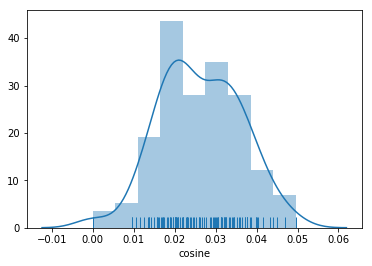

In [132]:
sns.distplot(df.cosine, kde=True, rug=True);

In [34]:
a = cosine_similarity(test,test)

In [39]:
a[0].sum()

3.454574996622868

In [40]:
a[2].sum()

1.4342482779237593

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
vec1 = np.array([[1,1,0,1,1]])
vec2 = np.array([[0,1,0,1,1]])
#print(cosine_similarity([vec1, vec2]))
print(cosine_similarity(vec1, vec2))

[[0.8660254]]


In [100]:
vec1.shape

(1, 5)